In [ ]:
# import torch
# import torch.nn as nn
# import numpy as np
# import torch.nn.functional as F
# from random import randint
# import utils
# import time

# 1. Basics (labs_lecture02)

In [2]:
import torch
import numpy as np

## 1.1 Tensor Initialization


#### 1.1.1 Init from NP array
+ torch.Tensor()**
+ torch.tensor()
+ torch.as_tensor()**
+ torch.from_numpy()

In [3]:
# How to initialize a tensor from a numpy array?
data = np.array([1,2,3]); print(f"np array: {data}")
print(f"PyTorch default dtype: ", torch.get_default_dtype())

t1 = torch.Tensor(data) # torch.get_default_dtype()
t2 = torch.tensor(data) # dtype=torch.float32 # will infer dtype
t3 = torch.as_tensor(data) # preferred over from_numpy #int32
t4 = torch.from_numpy(data) #int32
print(f"torch.Tensor: {t1.dtype}")
print(f"torch.tensor (will infer dtype): {t2.dtype}")
print(f"torch.as_tensor (preferred over from_numpy): {t3.dtype}")

np array: [1 2 3]
PyTorch default dtype:  torch.float32
torch.Tensor: torch.float32
torch.tensor (will infer dtype): torch.int32
torch.as_tensor (preferred over from_numpy): torch.int32


#### 1.1.2 Random/ Zero/ Identity Tensor

In [4]:
rand_t = torch.rand(2,3,4); print(f"rand: {rand_t}")
zero_t = torch.zeros(2,3,4); print(f"zeros: {zero_t}")
eye_t = torch.eye(3); print(f"eye: {eye_t}")

rand: tensor([[[0.2519, 0.2000, 0.6224, 0.0512],
         [0.8940, 0.7836, 0.4196, 0.6290],
         [0.3093, 0.2758, 0.8532, 0.1839]],

        [[0.5003, 0.2342, 0.6460, 0.7656],
         [0.1991, 0.5067, 0.0627, 0.0634],
         [0.9888, 0.1029, 0.1782, 0.1984]]])
zeros: tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
eye: tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


#### 1.1.3 Long Tensor (Integers)

In [5]:
# integer tensor MUST HAVE BRACKETS
int_t1 = torch.LongTensor([1,1]); print(f"LongTensor: {int_t1}")
int_t2 = torch.tensor([2,2], dtype=torch.int32) ; print(f"tensor(dtype=torch.int32): {int_t2}")
int_t3 = torch.tensor([3,3]).long(); print(f".long(): {int_t3}")

LongTensor: tensor([1, 1])
tensor(dtype=torch.int32): tensor([2, 2], dtype=torch.int32)
.long(): tensor([3, 3])


#### 1.1.4 Various Tensor Functions
+ .shape, .size()
+ .dim()
+ .type()
+ .view(), .reshape()
+ .arange(n), .randperm(n)
+ .item()

In [6]:
print_t = torch.rand([2,3,4])
print(f"Shape: {print_t.shape} and size: {print_t.size()}")
print(f"Dimension of Tensor: {print_t.dim()}")

Shape: torch.Size([2, 3, 4]) and size: torch.Size([2, 3, 4])
Dimension of Tensor: 3


In [7]:
print(f"view: {print_t.view(3,8)}") 
print(f"reshape: {print_t.reshape(-1, 6)}")
print(f"print_t is not modified until assigned: {print_t}")

view: tensor([[0.6100, 0.3649, 0.8195, 0.5589, 0.0757, 0.2870, 0.2976, 0.6137],
        [0.4933, 0.6793, 0.4217, 0.2902, 0.8520, 0.5158, 0.9310, 0.0615],
        [0.7767, 0.4820, 0.8789, 0.3615, 0.8430, 0.7894, 0.1958, 0.4761]])
reshape: tensor([[0.6100, 0.3649, 0.8195, 0.5589, 0.0757, 0.2870],
        [0.2976, 0.6137, 0.4933, 0.6793, 0.4217, 0.2902],
        [0.8520, 0.5158, 0.9310, 0.0615, 0.7767, 0.4820],
        [0.8789, 0.3615, 0.8430, 0.7894, 0.1958, 0.4761]])
print_t is not modified until assigned: tensor([[[0.6100, 0.3649, 0.8195, 0.5589],
         [0.0757, 0.2870, 0.2976, 0.6137],
         [0.4933, 0.6793, 0.4217, 0.2902]],

        [[0.8520, 0.5158, 0.9310, 0.0615],
         [0.7767, 0.4820, 0.8789, 0.3615],
         [0.8430, 0.7894, 0.1958, 0.4761]]])


In [8]:
ar_t = torch.arange(10); print(f"arange(n): {ar_t}") # ordered 0 to 9
randp_t = torch.randperm(10); print(f"randperm(n): {randp_t}") # random 0 to 9

arange(n): tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
randperm(n): tensor([9, 4, 7, 6, 3, 5, 2, 1, 0, 8])


In [9]:
# 0-dimensional tensor is a scalar => item()


## 1.2 Slicing of Tensor

In [10]:
A = torch.rand(10,2)
v = A[2] # third row
B = A[:5] # first 5 rows
x = A[0,0].item()
print(A, v)
print(B, x)

tensor([[0.7014, 0.0581],
        [0.0616, 0.0812],
        [0.0292, 0.0515],
        [0.8317, 0.6554],
        [0.4287, 0.5573],
        [0.4561, 0.1125],
        [0.8966, 0.8328],
        [0.9416, 0.8140],
        [0.5050, 0.3165],
        [0.2793, 0.6436]]) tensor([0.0292, 0.0515])
tensor([[0.7014, 0.0581],
        [0.0616, 0.0812],
        [0.0292, 0.0515],
        [0.8317, 0.6554],
        [0.4287, 0.5573]]) 0.7014090418815613


In [11]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship','Truck']
label_idx = dict(zip(range(len(labels)), labels))
print(label_idx)
print(labels[1:1+5]) # 1:6 exclusive

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}
['Automobile', 'Bird', 'Cat', 'Deer', 'Dog']


# 2. Linear & Vanilla NN (labs_lecture03)

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint

## 2.1 Linear Module
nn.Linear(in_features, out_features, bias=True)

In [13]:
linear_mod = nn.Linear(5, 2)
x = torch.rand(5)
y = linear_mod(x)
print(y)

tensor([ 0.5892, -0.2077], grad_fn=<AddBackward0>)


In [14]:
print(linear_mod.weight)
print(linear_mod.weight.size())
print(linear_mod.bias)
print(linear_mod.bias.size())
# modify weights
linear_mod.weight[0,1]=1
print(linear_mod.weight)

Parameter containing:
tensor([[ 0.1327,  0.1830,  0.2256, -0.3708,  0.0520],
        [ 0.4428, -0.2861, -0.4355,  0.3151,  0.0354]], requires_grad=True)
torch.Size([2, 5])
Parameter containing:
tensor([0.2138, 0.1369], requires_grad=True)
torch.Size([2])
Parameter containing:
tensor([[ 0.1327,  1.0000,  0.2256, -0.3708,  0.0520],
        [ 0.4428, -0.2861, -0.4355,  0.3151,  0.0354]], grad_fn=<CopySlices>)


## 2.2 Softmax
F.softmax(A, dim=1) 

For matrices, it’s dim=1. For others like vectors, it’s 0. Along the feature dim, not the data dim.

In [15]:
B = torch.Tensor([[1,2,3,4],
                 [1,2,3,5]])
print(B, B.size()) # 2,4
prob = F.softmax(B, dim=1) #rows (2)
print(f"=> Softmax over dim 1 (rows)")
print(prob)
print(prob.sum(1)) 
prob = F.softmax(B, dim=0) #cols (4)
print(f"=> Softmax over dim 0 (cols)")
print(prob)
print(prob.sum(0)) 

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 5.]]) torch.Size([2, 4])
=> Softmax over dim 1 (rows)
tensor([[0.0321, 0.0871, 0.2369, 0.6439],
        [0.0152, 0.0414, 0.1125, 0.8310]])
tensor([1., 1.])
=> Softmax over dim 0 (cols)
tensor([[0.5000, 0.5000, 0.5000, 0.2689],
        [0.5000, 0.5000, 0.5000, 0.7311]])
tensor([1., 1., 1., 1.])


## 2.3 Vanilla NN

In [16]:
class VanillaNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaNN, self).__init__() #super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size, bias=True)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=True)
        
    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.softmax(x, dim=0) #input is vector
        return x

net = VanillaNN(2,5,3)
print(net)
x = torch.Tensor([1,1]) # vector of size 2
p = net.forward(x)
print(p, p.sum(0))

VanillaNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=3, bias=True)
)
tensor([0.3805, 0.3381, 0.2814], grad_fn=<SoftmaxBackward>) tensor(1., grad_fn=<SumBackward1>)


In [17]:
list_of_param = list(net.parameters())
print(list_of_param)

[Parameter containing:
tensor([[-0.1305,  0.6956],
        [ 0.6211,  0.1304],
        [ 0.4560,  0.3106],
        [ 0.4957, -0.0670],
        [ 0.5893, -0.0382]], requires_grad=True), Parameter containing:
tensor([-0.4760,  0.0810,  0.1593,  0.5173, -0.5694], requires_grad=True), Parameter containing:
tensor([[-0.0191,  0.3351,  0.0589, -0.2274, -0.0845],
        [ 0.4393, -0.1054, -0.4354,  0.3945,  0.3253],
        [-0.3862,  0.2752, -0.0438, -0.1058, -0.3940]], requires_grad=True), Parameter containing:
tensor([ 0.1378,  0.2148, -0.1012], requires_grad=True)]


## 2.4 Train Vanilla NN

In [18]:
import utils

In [19]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()
train_data = torch.load(data_path+'mnist/train_data.pt')
train_label = torch.load(data_path+'mnist/train_label.pt')
test_data = torch.load(data_path+'mnist/test_data.pt')
test_label = torch.load(data_path+'mnist/test_label.pt')
print(train_data.size())
print(train_label.size())
print(test_data.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])


### 2.4.1 One Layer Net

In [20]:
class One_Layer_Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(One_Layer_Net, self).__init__()
        self.linear_layer = nn.Linear(input_size,output_size,bias=True)
    def forward(self, x): 
        x = self.linear_layer(x)
        p = F.softmax(x, dim=1)
        return p
    
net = One_Layer_Net(784, 10)
p = net(test_data[6].view(1,784)) # [Batch, InputSize]
print(p)

tensor([[0.0882, 0.1228, 0.1177, 0.0632, 0.1057, 0.0757, 0.1414, 0.1014, 0.0975,
         0.0863]], grad_fn=<SoftmaxBackward>)


### 2.4.2 Train One Layer Net (MNIST) without mini-batch
idx = randint(0,len(train_data)-1) --- [0,60000]

tensor([[3.1055e-04, 2.3272e-04, 2.6119e-04, 1.7689e-02, 7.2990e-01, 3.1487e-02,
         2.2647e-03, 6.5711e-02, 6.5343e-02, 8.6804e-02]],
       grad_fn=<SoftmaxBackward>)


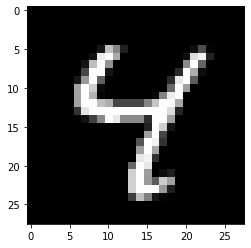

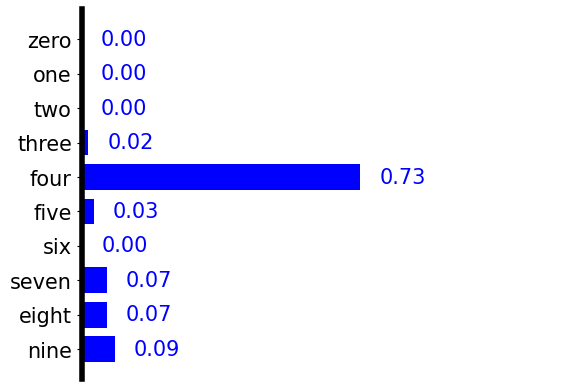

In [21]:
from random import randint
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
for i in range(5000):
    idx = randint(0,len(train_data)-1) # pick one randomly from 60000
    
    inputs = train_data[idx].view(1,784) # [Batch, InputSize]
    labels = train_label[idx].view(1) # make to tensor of size 1
    
    inputs.requires_grad_()
    probs = net(inputs)
    
    log_probs = torch.log(probs)
    loss = criterion(log_probs, labels)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    
p = net(test_data[6].view(1,784)) 
print(p)
utils.show(test_data[6])
utils.show_prob_mnist(p)

### 2.4.3 Train One Layer Net (MNIST) with mini-batch
indices=torch.LongTensor(2).random_(0,5) ---- [0,5)

tensor([[8.4774e-04, 3.0844e-05, 4.8178e-03, 3.4739e-05, 2.2243e-03, 8.9244e-05,
         9.8649e-01, 1.0972e-05, 4.7233e-03, 7.2996e-04]],
       grad_fn=<SoftmaxBackward>)


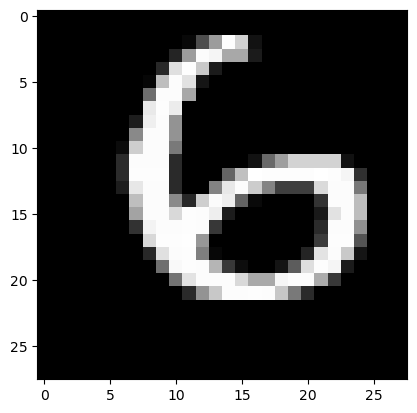

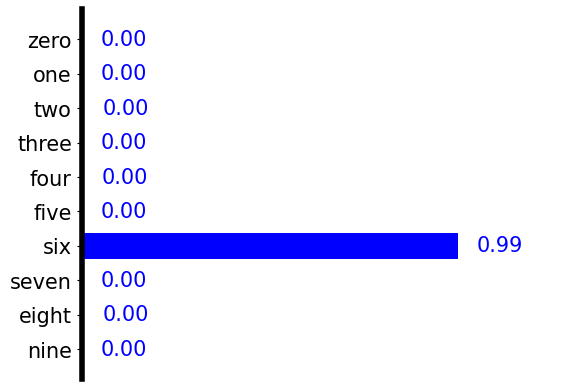

In [22]:
net = One_Layer_Net(784, 10)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
bs = 200

for iter in range(1,5000):
    # create a minibatch
    indices=torch.LongTensor(bs).random_(0,len(train_data)) 
    minibatch_data = train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape them to fit the network
    inputs = minibatch_data.view(bs, 784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob = net(inputs) 
    
    log_prob = torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    
idx = randint(0, len(test_data)-1)    
p = net(test_data[idx].view(1,784)) 
print(p)
utils.show(test_data[idx])
utils.show_prob_mnist(p)

# 3. Cross Entropy (labs_lecture04)
criterion = nn.CrossEntropyLoss()

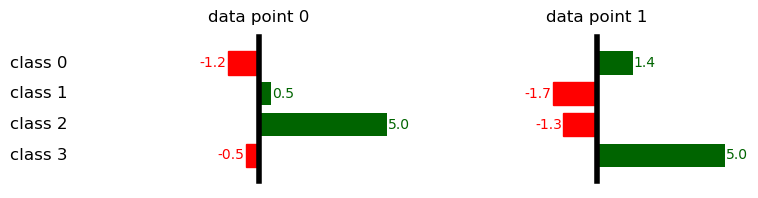

loss =  0.023508397862315178  good!


In [23]:
criterion = nn.CrossEntropyLoss()
labels = torch.LongTensor([2,3])
scores = torch.Tensor([[-1.2, 0.5 , 5, -0.5], [1.4, -1.7 , -1.3, 5.0]])
utils.display_scores(scores)
average_loss = criterion(scores, labels)
print('loss = ', average_loss.item(), " good!")

# 4. MLP + Full Training Loop (labs_lecture05)

## 4.1 Epoch
Shuffled Indices

In [24]:
bs = 2
shuffled_indices = torch.randperm(10) #len of train_data
for count in range(0,10,bs):
    batch_of_indices = shuffled_indices[count:count+bs]
    print(batch_of_indices)

tensor([1, 0])
tensor([2, 4])
tensor([3, 6])
tensor([9, 8])
tensor([7, 5])


## 4.2 Monitoring Loss
running_loss += loss.detach().item() \
error = utils.get_error(scores.detach(), minibatch_label) \
running_error += error.item()

total_loss = running_loss/num_batches \
total_error = running_error/num_batches 

## 4.3 Full Loop

In [25]:
class three_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super(three_layer_net , self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1) 
        self.layer2 = nn.Linear(hidden_size2, hidden_size2) 
        self.layer3 = nn.Linear(hidden_size2, output_size) 
        
    def forward(self, x):
        
        y       = self.layer1(x) 
        y_hat   = F.relu(y) 
        z       = self.layer2(y_hat) 
        z_hat   = F.relu(z) 
        scores  = self.layer3(z_hat)
        
        return scores

In [26]:
import time
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# device = torch.device("cpu")

cuda:0


In [27]:
net = three_layer_net(784, 200, 200, 10).to(device)
print(net)
utils.display_num_param(net)

three_layer_net(
  (layer1): Linear(in_features=784, out_features=200, bias=True)
  (layer2): Linear(in_features=200, out_features=200, bias=True)
  (layer3): Linear(in_features=200, out_features=10, bias=True)
)
There are 199210 (0.20 million) parameters in this neural network


In [28]:
def eval_on_test_set():
    running_error = 0
    num_batches = 0
    for i in range(0, len(test_data), bs):
        minibatch_data = test_data[i:i+bs].to(device)
        minibatch_label = test_label[i:i+bs].to(device)
        inputs = minibatch_data.view(bs, 784)
        scores = net(inputs)
        error = utils.get_error(scores, minibatch_label)
        running_error += error.detach().item()
        num_batches += 1
    total_error = running_error / num_batches
    print(f"=> test error: {total_error*100} %")

In [29]:
criterion = nn.CrossEntropyLoss()
bs = 200
lr = 0.05 # initial learning rate

In [30]:
start = time.time()
for epoch in range(200):
    # update learning rate based on lr strategy
    if epoch % 10 == 0 and epoch > 10: 
        lr = lr / 1.5 
    
    # reset optimizer with new learning rate
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    
    running_loss = 0
    running_error = 0
    num_batches = 0
    
    shuffled_indices=torch.randperm(len(train_data)) # 60000
    
    for count in range(0, len(train_data), bs):
        optimizer.zero_grad() 
        
        batch_of_indices = shuffled_indices[count:count+bs]
        minibatch_data = train_data[count:count+bs].to(device)
        minibatch_label = train_label[count:count+bs].to(device)
        
        inputs = minibatch_data.view(bs, 784)
        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()
        
        scores = net(inputs)
        
        loss = criterion(scores, minibatch_label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().item()
        error = utils.get_error(scores, minibatch_label)
        running_error += error.detach().item()
        num_batches += 1
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    if epoch % 10 == 0 : 
        print(' ') 
        print(f"epoch={epoch}, time={elapsed_time}, loss={total_loss}, error={total_error*100}%, lr={lr}")
        eval_on_test_set()
    

 
epoch=0, time=1.2909417152404785, loss=1.2432209846377373, error=30.033335089683533%, lr=0.05
=> test error: 13.610001921653748 %
 
epoch=10, time=9.536717414855957, loss=0.15902499979361892, error=4.546668827533722%, lr=0.05
=> test error: 4.640002250671387 %
 
epoch=20, time=17.717833995819092, loss=0.08623850248133143, error=2.438336710135142%, lr=0.03333333333333333
=> test error: 3.0800024271011353 %
 
epoch=30, time=26.091994047164917, loss=0.06136114076245576, error=1.6783369382222493%, lr=0.022222222222222223
=> test error: 2.5800020694732666 %
 
epoch=40, time=34.3183434009552, loss=0.04975701715176304, error=1.310003141562144%, lr=0.014814814814814815
=> test error: 2.4100022315979004 %
 
epoch=50, time=42.501131534576416, loss=0.043430003157506385, error=1.1066695650418599%, lr=0.009876543209876543
=> test error: 2.3700023889541626 %
 
epoch=60, time=50.699180126190186, loss=0.03971406589417408, error=0.978335936864217%, lr=0.006584362139917695
=> test error: 2.34000241756

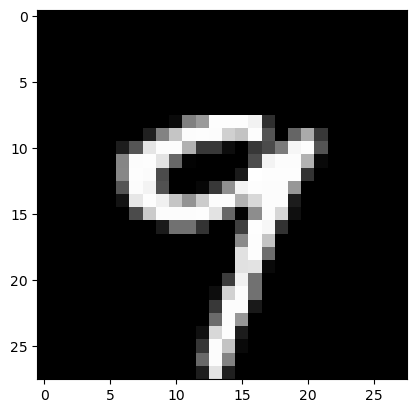

torch.Size([1, 10])


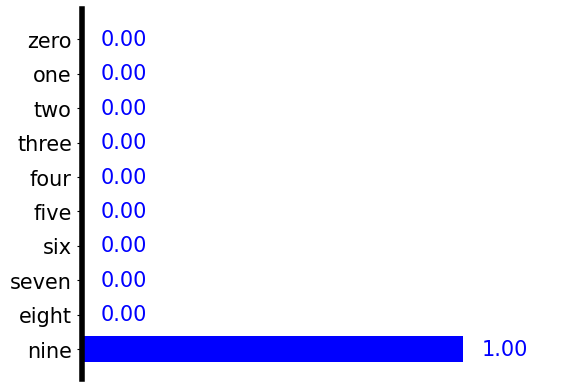

In [31]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1,784).to(device)) 
probs = F.softmax(scores, dim=1)
print(probs.shape)
utils.show_prob_mnist(probs.cpu())